In [4]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Моделирование ЦМ. Свойств ЦМ. Стационарные распределения

In [79]:
#Рассмотрим цепочку Маркова, заданную следующей стохастической матрицей
P = [[0.25, 0.25, 0.0, 0.0, 0.5],
     [1/3, 0.0, 1/3, 1/3, 0.0],
      [1/2, 0.0, 0.0, 0.0, 1/2],
      [0.0, 0.0, 0.0, 1/2, 1/2],
     [0.0, 0.0, 0.0, 1, 0.0]]


mc = qe.MarkovChain(P)

print(mc)


<bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[0.25       0.25       0.         0.         0.5       ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.         0.        ]]>



Классификация состояний ЦМ
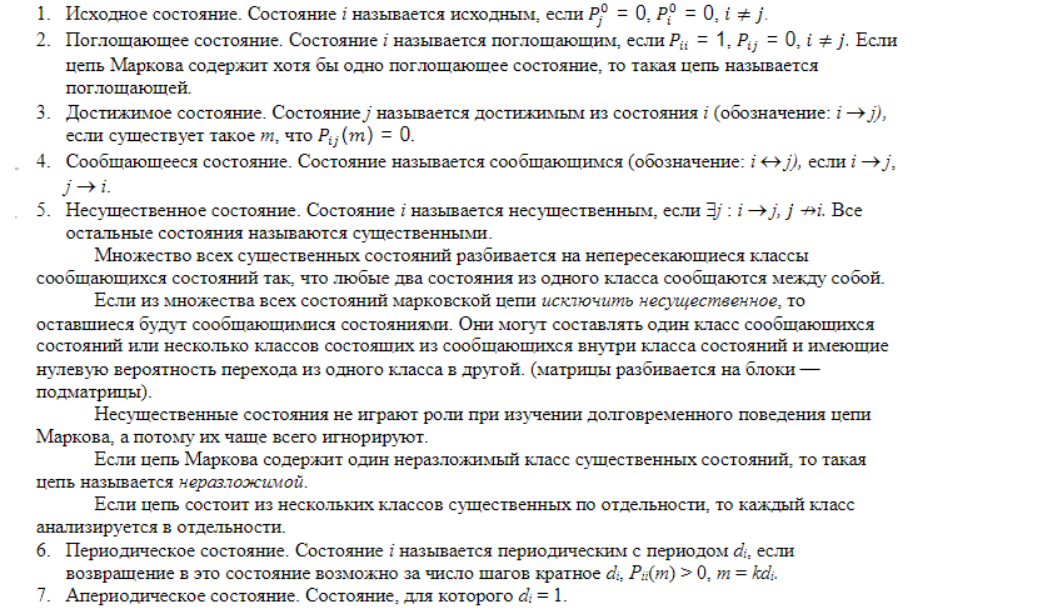
Исследуем матрицу на виды состояний




1)Стохастическая матрица 𝑃 is называется неприводимой(неразложимой) если все состояния сообщающиеся, то есть в конечном итоге мы можем достичь любого состояния из любого другого состояния.

Р разложима

In [81]:
mc.is_irreducible


False

Мы также можем определить «сообщающиеся классы». Состояния этой цепи образуют 2 неразложимых класса



In [80]:

mc.num_communication_classes


2

In [82]:
mc.communication_classes


[array([3, 4], dtype=int64), array([0, 1, 2], dtype=int64)]

In [50]:
mc.recurrent_classes


[array([0], dtype=int64), array([1, 4], dtype=int64)]

In [51]:
mc.stationary_distributions


array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        ]])

In [52]:
mc.period


1

In [53]:

P2 = [[1/3, 2/3, 0.0, 0.0, 0.0, 0.0],
     [2/3, 1/3, 0.0, 0.0, 0.0, 0.0],
      [ 0.0, 0.0, 1/4, 3/4, 0.0, 0.0],
      [0.0, 0.0, 1/5, 4/5, 0.0, 0.0],
      [1/4, 0.0, 1/4, 0.0, 1/4, 1/4],
     [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]]

In [54]:
mc2 = qe.MarkovChain(P2)
print(mc2)

<bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[0.33333333 0.66666667 0.         0.         0.         0.        ]
 [0.66666667 0.33333333 0.         0.         0.         0.        ]
 [0.         0.         0.25       0.75       0.         0.        ]
 [0.         0.         0.2        0.8        0.         0.        ]
 [0.25       0.         0.25       0.         0.25       0.25      ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]>


In [55]:
mc2.is_irreducible


False

In [56]:
mc2.num_communication_classes


3

In [57]:
mc2.communication_classes


[array([0, 1], dtype=int64),
 array([2, 3], dtype=int64),
 array([4, 5], dtype=int64)]

In [58]:
mc2.recurrent_classes


[array([0, 1], dtype=int64), array([2, 3], dtype=int64)]

In [59]:
mc2.stationary_distributions


array([[0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.21052632, 0.78947368, 0.        ,
        0.        ]])

In [60]:
mc2.period


1

5)Рассмотрим состояния банка, характеризующиеся одной из процентных ставок: 12%, 13%, 14%, которые устанавливаются в начале каждого квартала и фиксированы на всем его протяжении. Таким образом, если за систему S принять действующую процентную ставку, то она в каждый момент времени может находиться только в одном из состояний: s1 – процентная ставка 12%, s2 – процентная ставка 13%, s3 – процентная ставка 14%. Анализ работы банка в предшествующие годы показал, что изменение переходных вероятностей с течением времени пренебрежимо мало. Определить распределение вероятностей состояний системы в конце года, если в конце предыдущего года процентная ставка составила 13%, а граф вероятностей переходов имеет вид
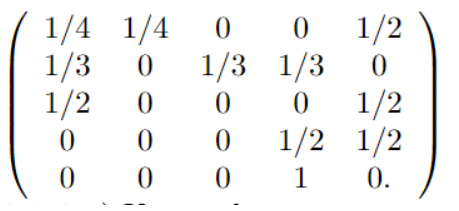

Матрица переходных вероятностей



In [61]:
P3 = np.array([[0.4, 0.4, 0.2],
     [0.2, 0.5, 0.3],
     [0.1, 0.3, 0.6]])

Вектор начального распределения

In [62]:
mc1 = qe.MarkovChain(P3)
mc1.stationary_distributions

array([[0.2, 0.4, 0.4]])

Проверка переодичности

In [63]:
mc1.is_aperiodic


True

Кол-во периодов

In [64]:
mc1.period


1

In [65]:
p = np.array([[0.1, 0.0, 0.8],
     [0.7, 0.2, 0.1],
     [0.2, 0.8, 0.0]])

In [66]:
a = (0.2, 0.4, 0.4)
res=a @ p
res

array([0.38, 0.4 , 0.2 ])

In [67]:
import networkx
from networkx import *

In [68]:
graph = Graph()
graph

In [69]:
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')

graph.nodes()

NodeView(('A', 'B', 'C'))

In [70]:
def add_edge(f_item, s_item, graph=None):
  graph.add_edge(f_item, s_item)
  graph.add_edge(s_item, f_item)

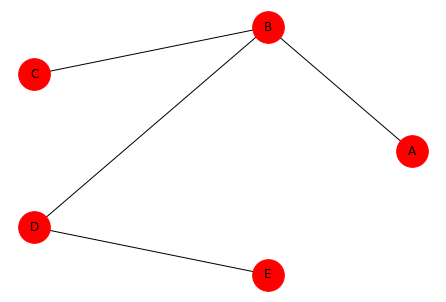

In [71]:
add_edge('A', 'B', graph=graph)
add_edge('B', 'C', graph=graph)
add_edge('B', 'D', graph=graph)
add_edge('D', 'E', graph=graph)

nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

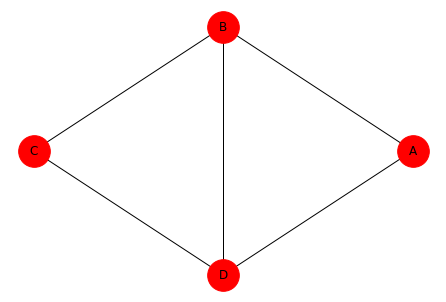

In [72]:
cities = {'A':(0, 20),
     'B':(15, 24),
     'C':(16, 41),
     'D':(10, 40)}

graph = nx.Graph()
graph.add_nodes_from(cities)
kilometres = {('A', 'B', 15),
              ('B', 'C', 16),
              ('B', 'D', 25),
              ('C', 'D', 14),
              ('D', 'A', 18)}

graph.add_weighted_edges_from(kilometres)
nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)